# Multilayer model MNIST classification

Note: This notebook is designed to run with CPU (no GPU) runtime.

Import modules and set random seeds.

In [1]:
import os, random
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

random.seed(20230515)
np.random.seed(20190825)
tf.random.set_seed(20190825)

plt.rcParams.update({'font.size': 10})

Download the MNIST dataset and store into NumPy arrays.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                    (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                    (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Define the multilayer feedforward network model.

In [3]:
model = models.Sequential(name='multilayer_model')
model.add(layers.Input(shape=(784,), name='input'))
model.add(layers.Dense(512, activation='relu', name='feedforward1'))
model.add(layers.Dense(256, activation='relu', name='feedforward2'))
model.add(layers.Dense(128, activation='relu', name='feedforward3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "multilayer_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ feedforward1 (Dense)                 │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ feedforward2 (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ feedforward3 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model using the Adam optimizer, and categorical crossentroy as a loss function.

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

Train the model. It acheves around 98% accuracy for the test dataset.

In [5]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - acc: 0.8669 - loss: 0.4483 - val_acc: 0.9683 - val_loss: 0.1004
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - acc: 0.9723 - loss: 0.0942 - val_acc: 0.9761 - val_loss: 0.0804
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - acc: 0.9825 - loss: 0.0562 - val_acc: 0.9778 - val_loss: 0.0823
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - acc: 0.9868 - loss: 0.0419 - val_acc: 0.9783 - val_loss: 0.0823
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - acc: 0.9895 - loss: 0.0339 - val_acc: 0.9768 - val_loss: 0.0840
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - acc: 0.9919 - loss: 0.0249 - val_acc: 0.9774 - val_loss: 0.0896
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - acc: 0.9930 - loss: 0.0221 - val_acc: 0.9732 - val_loss: 0.1149
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.9929 - loss: 0.0215 - val_acc: 0.9788 - val_loss: 0.0936
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 

Plot charts for the accuracy and loss values.

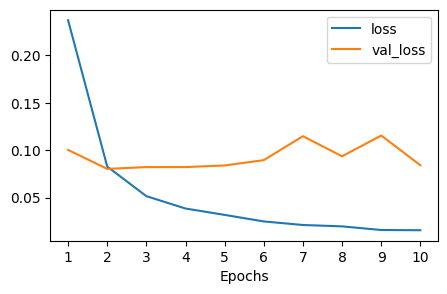

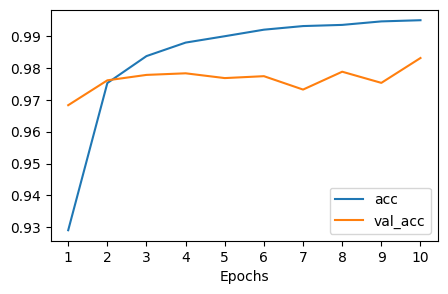

In [6]:
df = DataFrame({'loss': history.history['loss'],
                'val_loss': history.history['val_loss']})
df.index.name = 'Epochs'
ax = df.plot(figsize=(5, 3))
ax.set_xticks(df.index)
_ = ax.set_xticklabels(df.index+1)

df = DataFrame({'acc': history.history['acc'],
                'val_acc': history.history['val_acc']})
df.index.name = 'Epochs'
ax = df.plot(figsize=(5, 3))
ax.set_xticks(df.index)
_ = ax.set_xticklabels(df.index+1)